# Explore here

Banking Marketing Campaign

Business Insight

Long-term deposits allow banks to hold money for a specific period of time, allowing the bank to use that money to enhance its investments. Marketing campaigns for this product are based on phone calls. If a user is not available at a given time, then they will be called back at another time.

Description of the problem

The Portuguese bank is experiencing a decline in revenue, so they want to be able to identify existing customers who are more likely to take out a long-term deposit. This will allow the bank to focus their marketing efforts on those customers and avoid wasting money and time on customers who are unlikely to sign up.

To address this problem we will create a ranking algorithm to help predict whether or not a customer will sign up for a long-term deposit.


In this dataset, you will find the following variables:

age. Age of customer (numeric)

job. Type of job (categorical)

marital. Marital status (categorical)

education. Level of education (categorical)

default. Do you currently have credit (categorical)

housing. Do you have a housing loan (categorical)

loan. Do you have a personal loan? (categorical)

contact. Type of contact communication (categorical)

month. Last month in which you have been contacted (categorical)

day_of_week. Last day on which you have been contacted (categorical)

duration. Duration of previous contact in seconds (numeric)

campaign. Number of contacts made during this campaign to the customer (numeric)

pdays. Number of days that elapsed since the last campaign until the customer was contacted (numeric)

previous. Number of contacts made during the previous campaign to the customer (numeric)

poutcome. Result of the previous marketing campaign (categorical)

emp.var.rate. Employment variation rate. Quarterly indicator (numeric)

cons.price.idx. Consumer price index. Monthly indicator (numeric)

cons.conf.idx. Consumer confidence index. Monthly indicator (numeric)

euribor3m. EURIBOR 3-month rate. Daily indicator (numeric)

nr.employed. Number of employees. Quarterly indicator (numeric)

y. TARGET. Whether the customer takes out a long-term deposit or not (categorical)


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')
raw_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
raw_data.shape

(41188, 21)

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Based on the data info there are no missing values.

In [9]:
raw_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


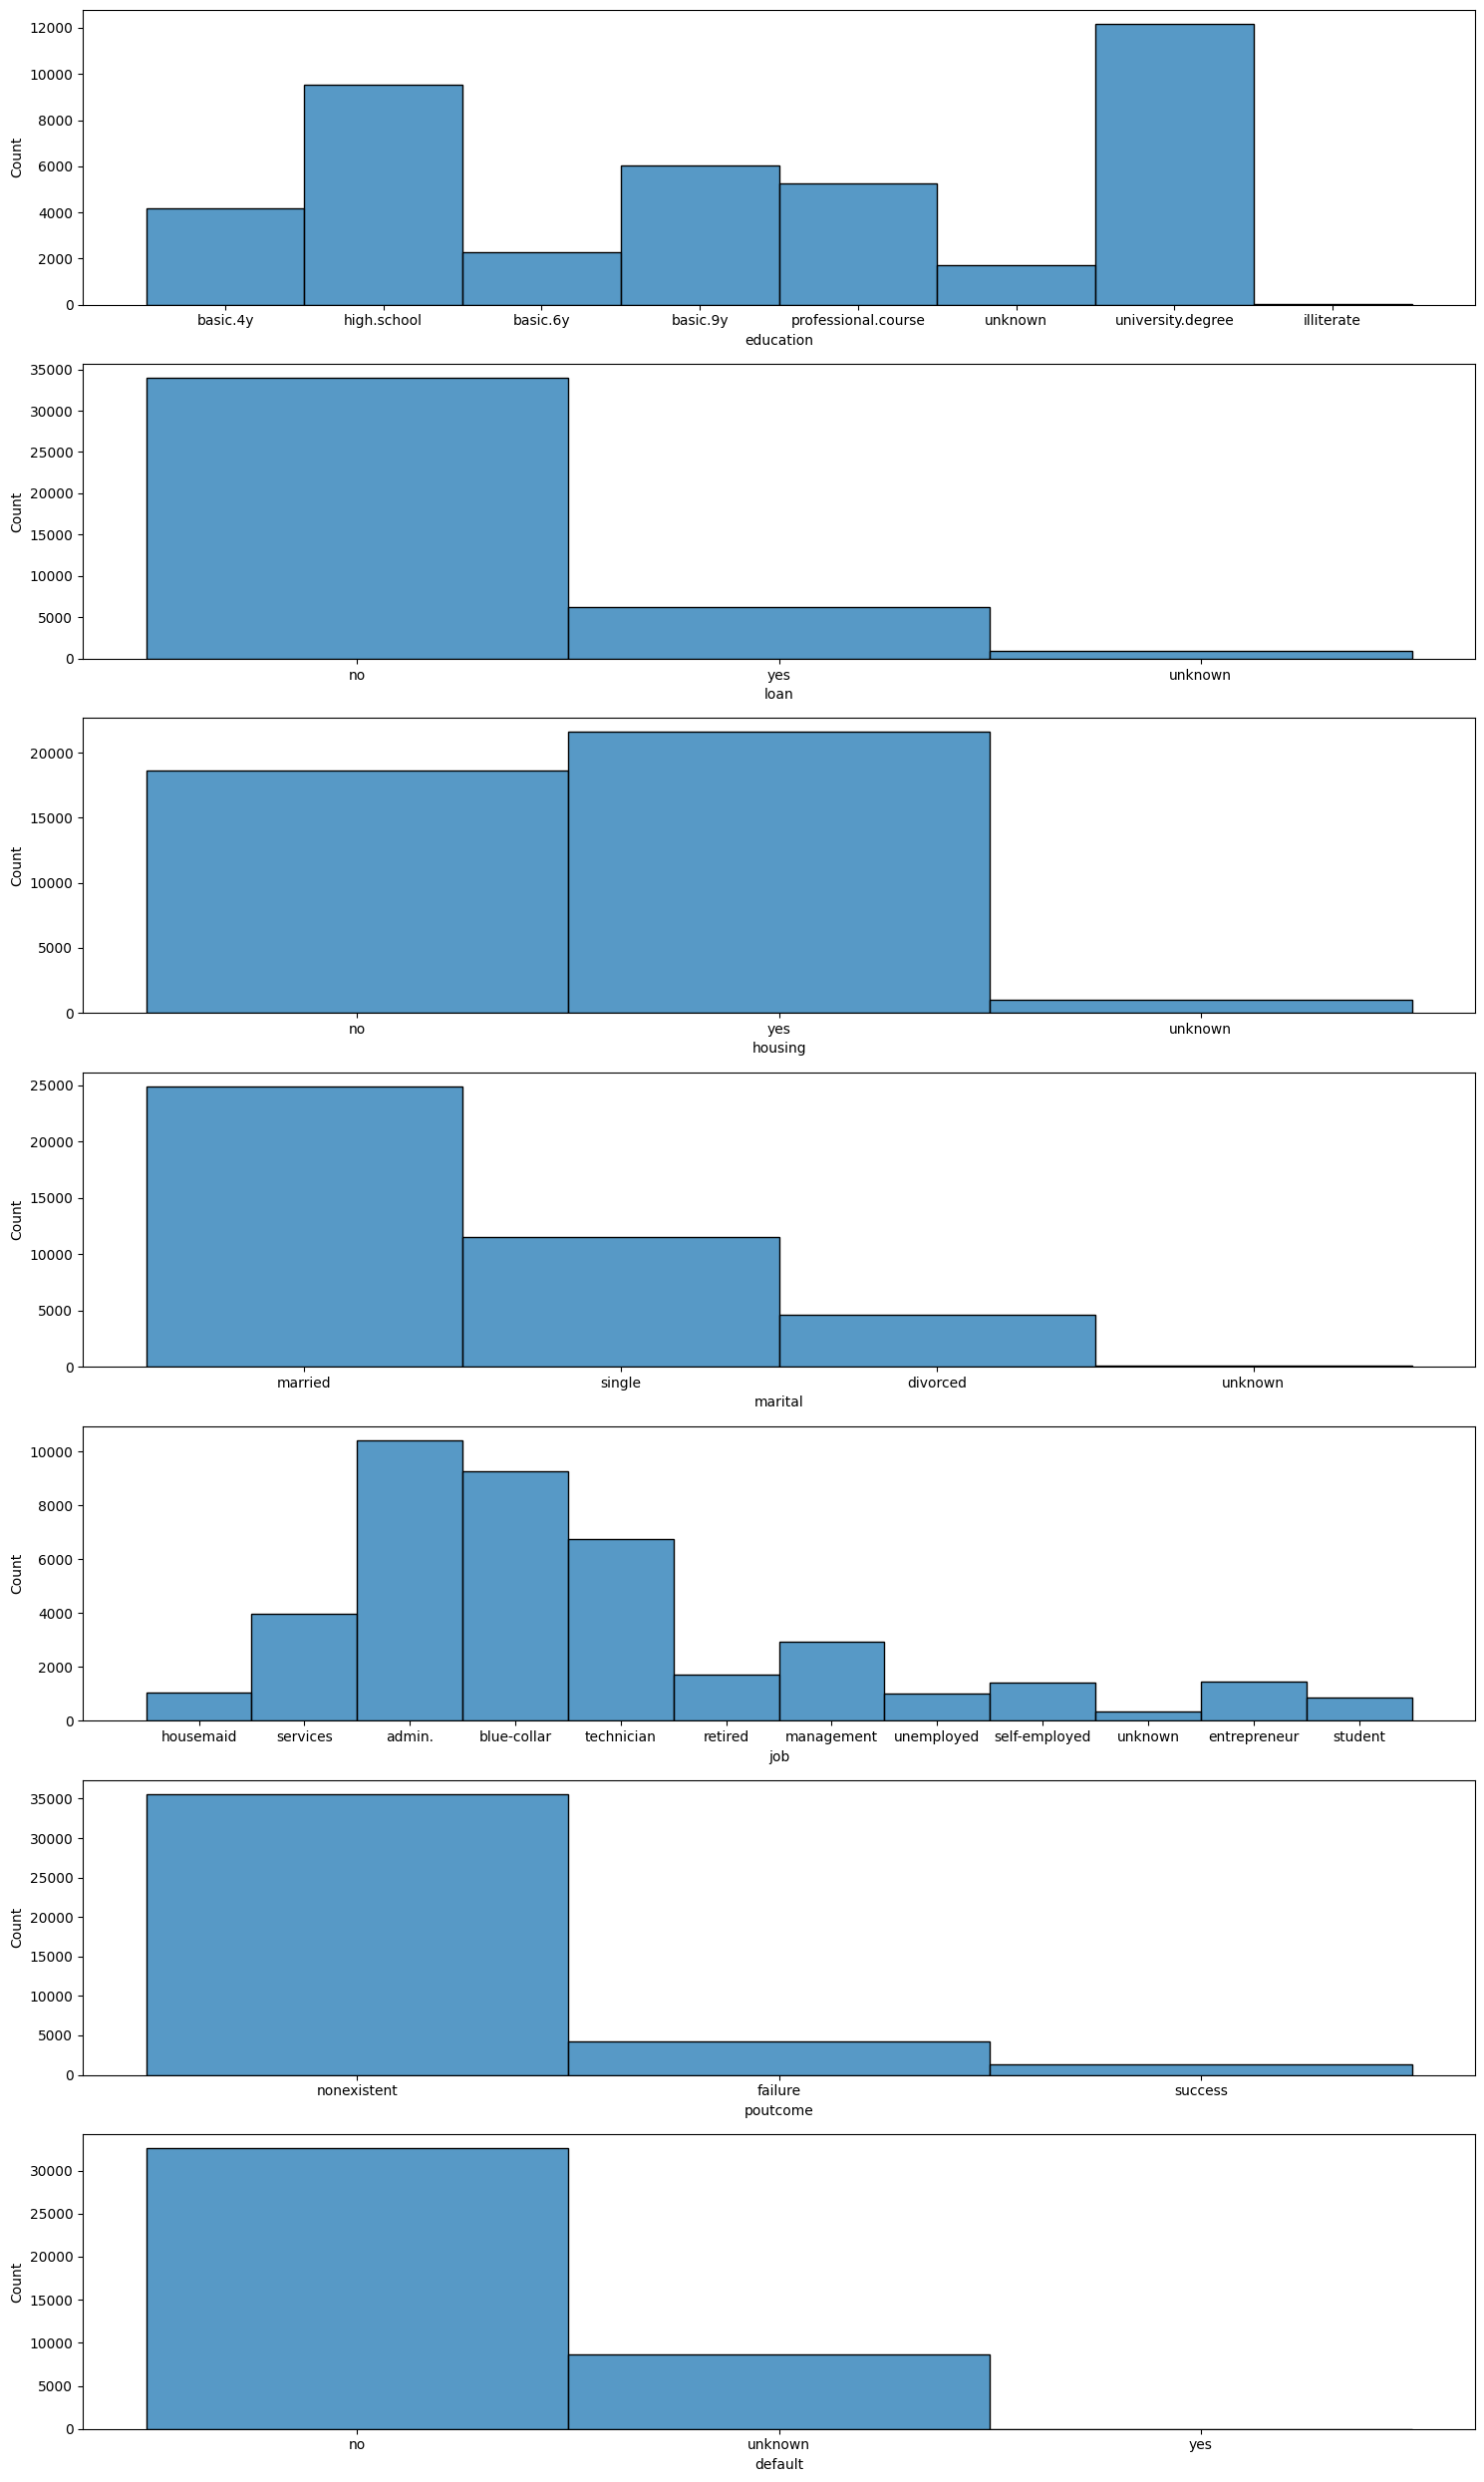

In [16]:
fig, axis = plt.subplots(figsize=(15, 25), nrows=7)
axis = axis.flatten()

variables = ['education', 'loan', 'housing', 'marital', 'job', 'poutcome', 'default']

for i, variable in enumerate(variables):
    sns.histplot(ax=axis[i], data=raw_data, x=variable)

plt.tight_layout()

plt.show()

Note the following:
- The majority of customers have either a college degree or highschool education.
- Most customers do not have a personal loan.
- About half the customers have a home loan.
- Most of the customers are married.
- The top three types of employment among customers are admin, blue-collar and technician.
- for poutcome (the outcome of the previous campaign) whether or not it was a success or failure for most of the customers is unknown
- Most customers do not currently have credit with the bank

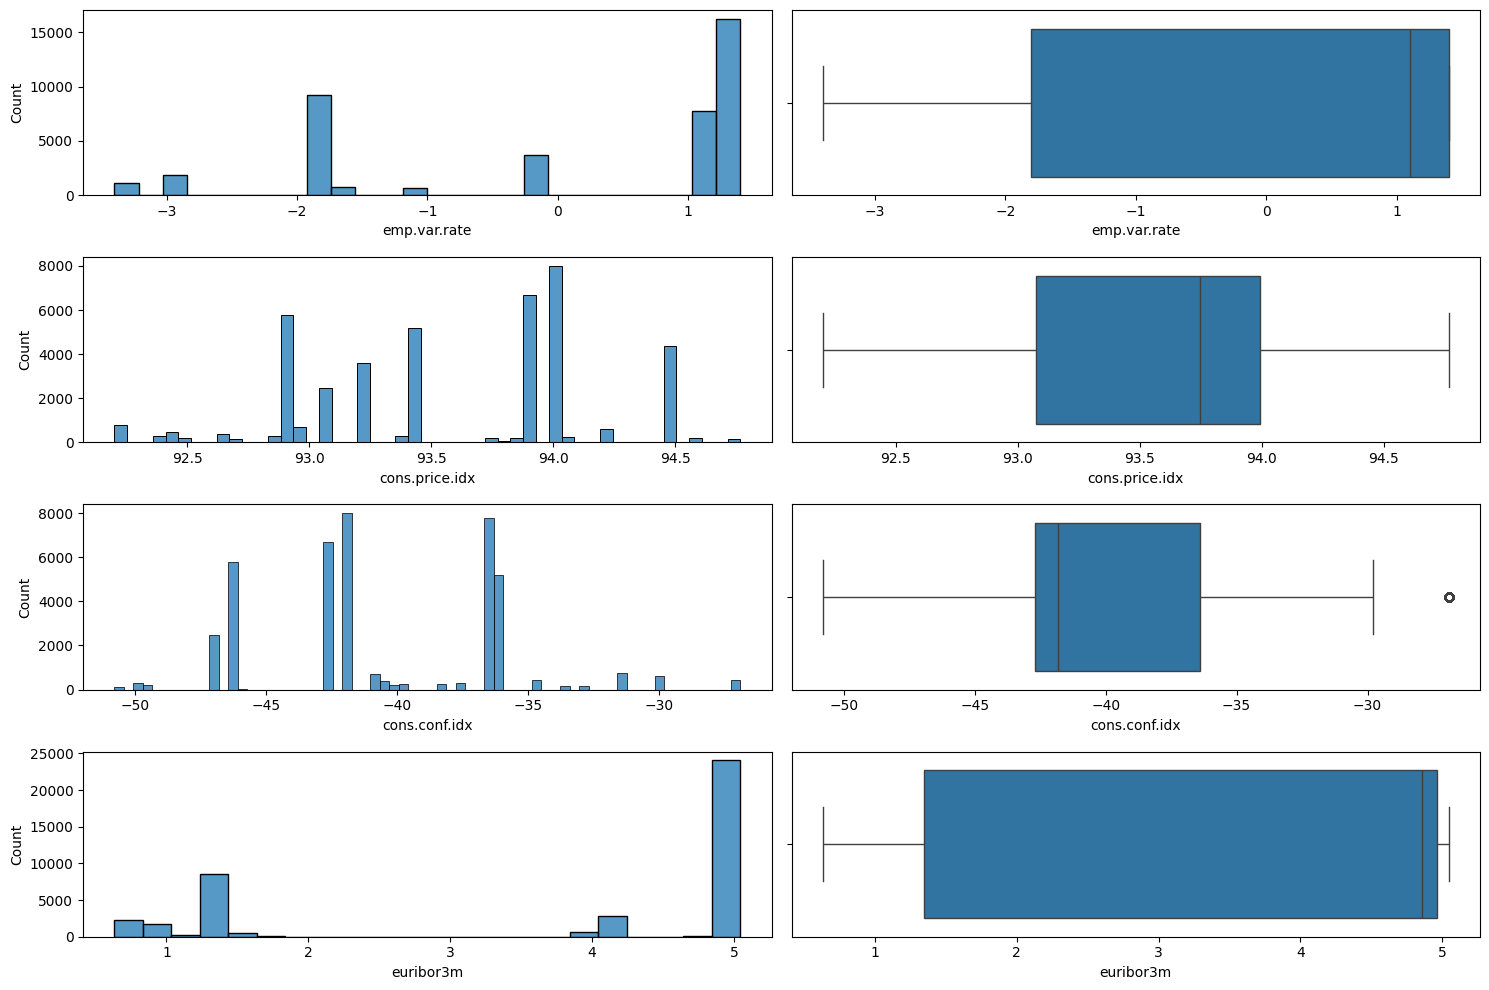

In [18]:
fig, axis = plt.subplots(4, 2, figsize=(15, 10))
axis = axis.flatten()

variables = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
for i, variable in enumerate(variables):
    sns.histplot(ax=axis[i * 2], data=raw_data, x=variable)
    sns.boxplot(ax=axis[i * 2 + 1], data=raw_data, x=variable)

plt.tight_layout()

plt.show()


Note the following

- The majority of euribor3m (the rate at which european banks loan funds to each other) seems to be at 5%

- The cons.conf.idx. (Consumer Confidence Index) are all negative,  meaning that Consumers are pessimistic about the economy and less likely to spend.

- For Portugal a cons.price.idx (Consumer Price Index) in the 90's is high compared to its average which is generally in the 50's. A high CPI indicates inflation.

- The emp.var.rate (Employment variation rate) appears to show more instances of it being negative than positive. A higher rate indicates low unemployment and vice versa.

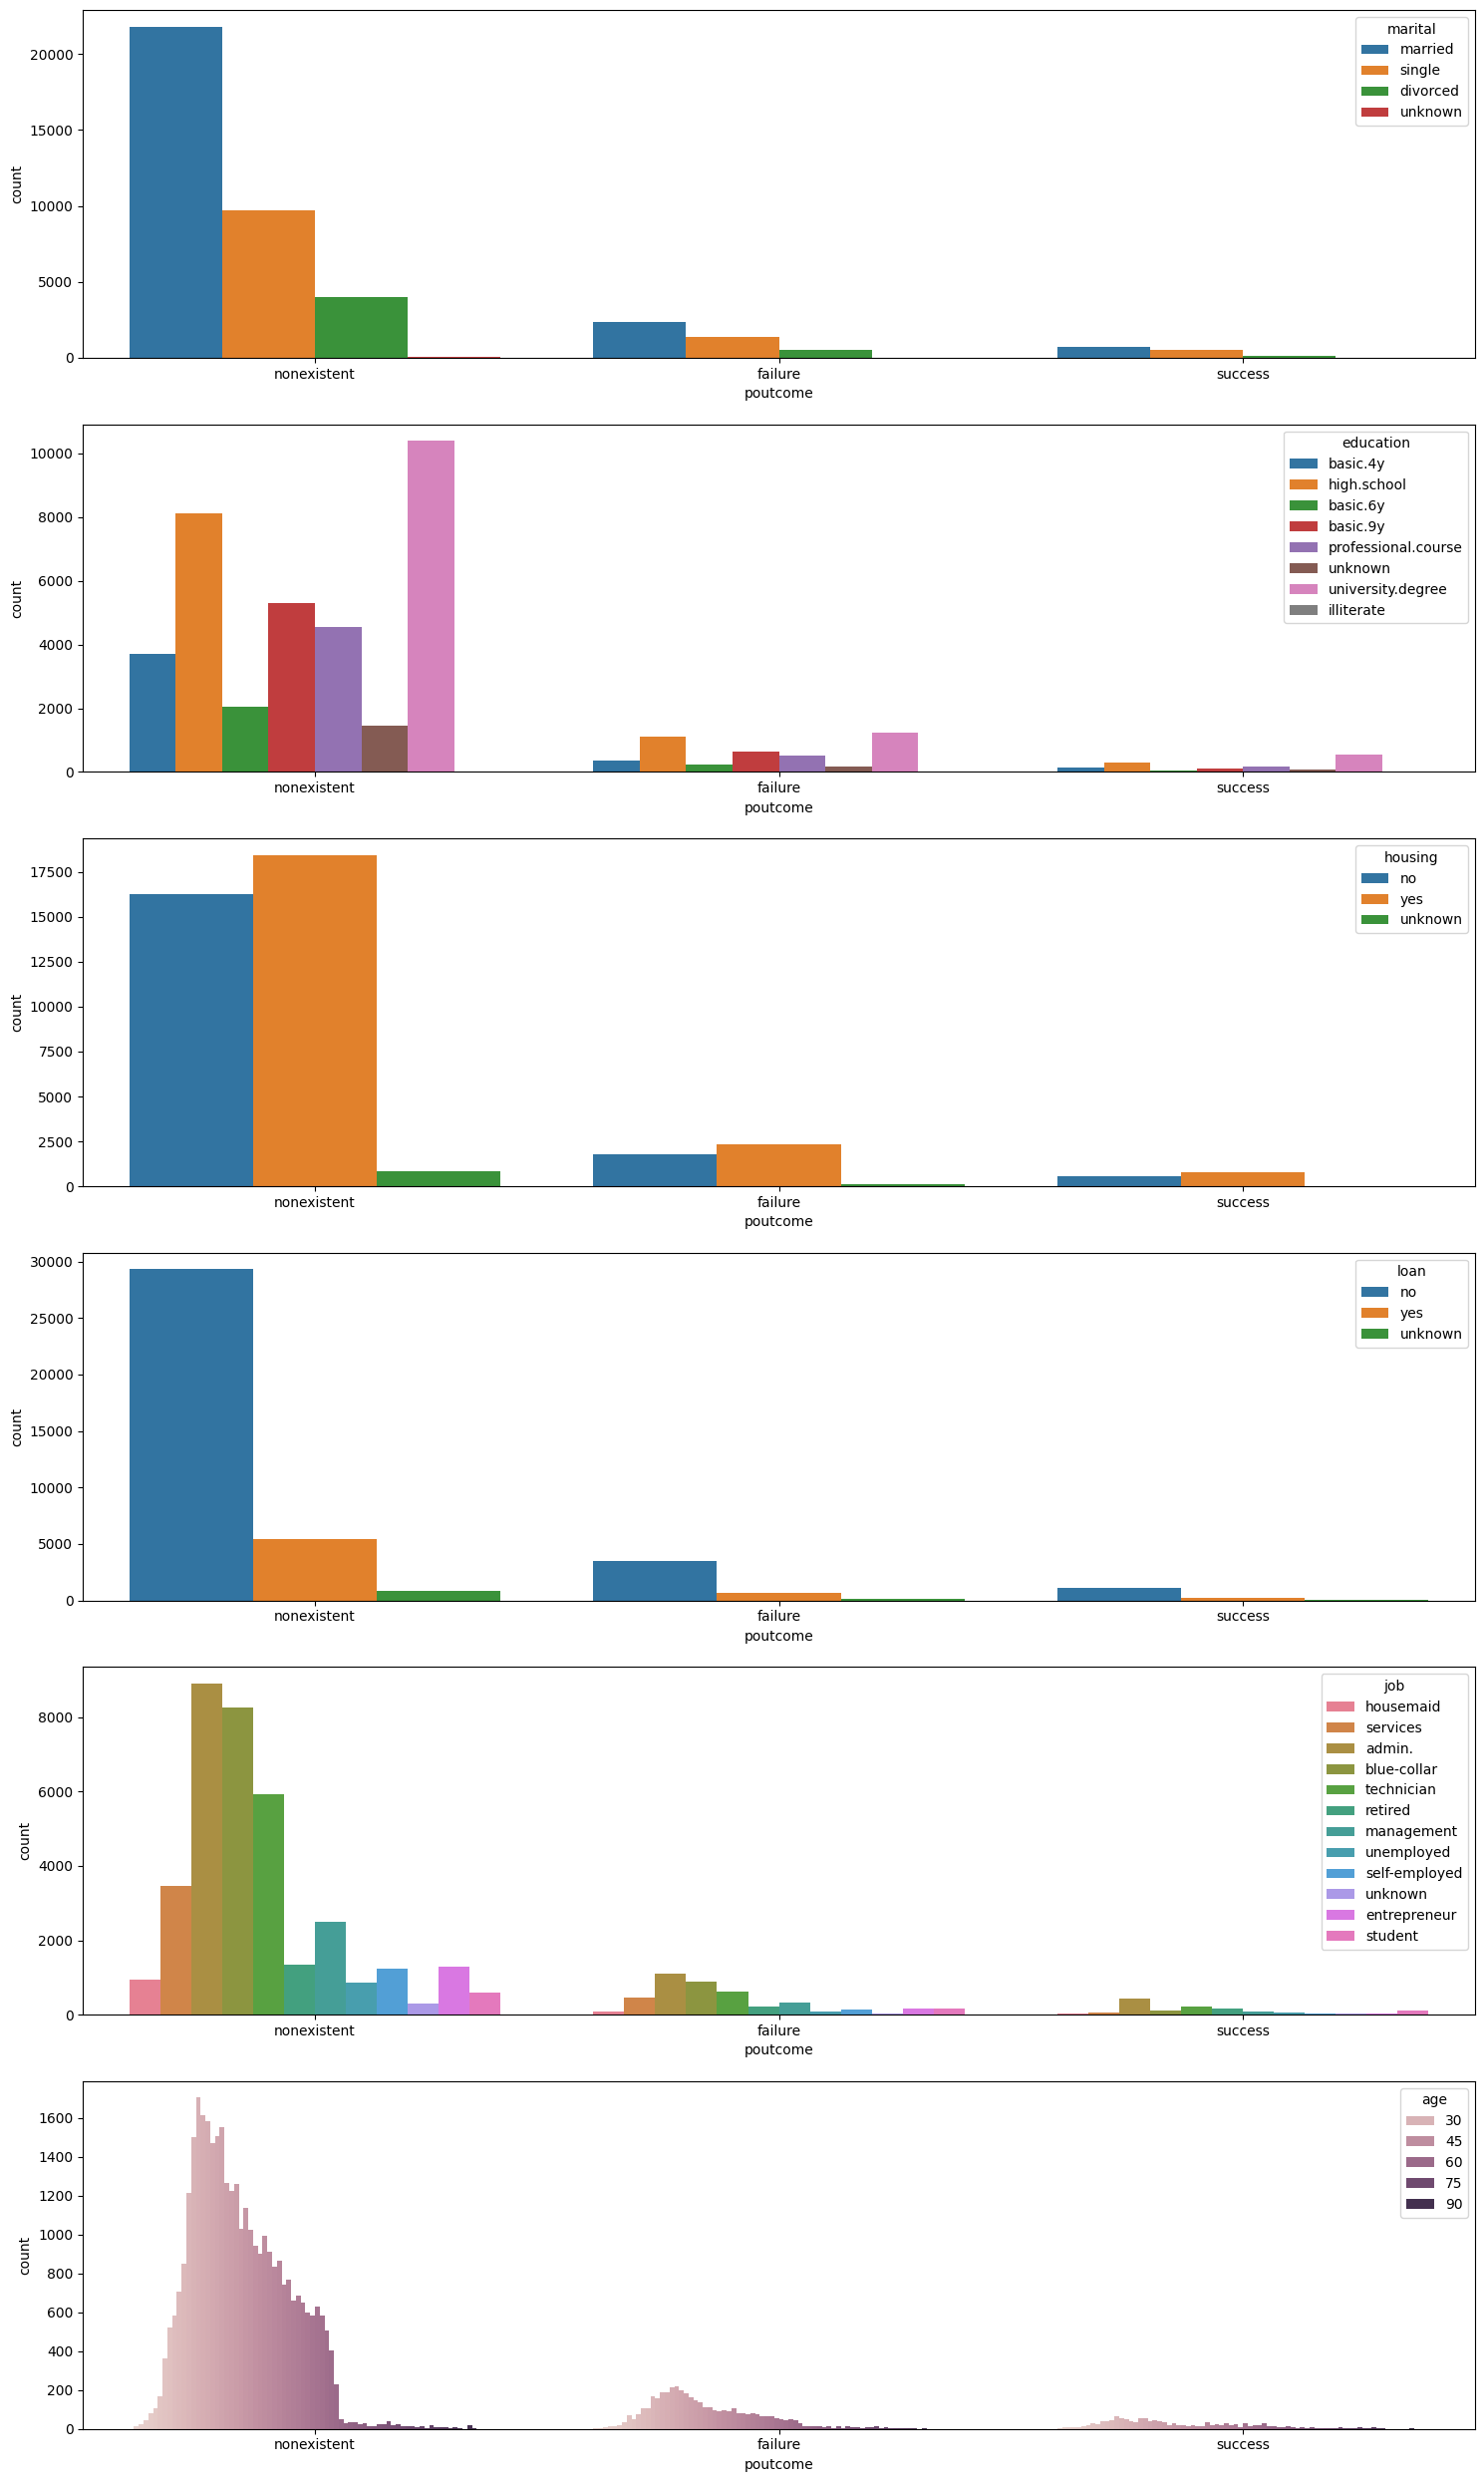

In [20]:
fig, axis = plt.subplots(figsize=(15, 25), nrows=6)
axis = axis.flatten()

variables = ['poutcome']
hues = ['marital', 'education', 'housing', 'loan', 'job', 'age']

for variable in variables:
    for i, hue in enumerate(hues):
        sns.countplot(ax=axis[i], data=raw_data, x=variable, hue=hue)

plt.tight_layout()

plt.show()

Note the following
- Success was highest among those customers who were married
- Success was highest among those who had a home loan
- Success was highest among those customers who work in administration
- Success was highest among customers who did not have a personal loan
- Success was highest among customers who were younger.